<a href="https://colab.research.google.com/github/IsaelOliveira/Data-Sciente-Projects/blob/master/Projeto_6_Utilizando_algoritmo_de_%C3%81rvore_de_Decis%C3%A3o_para_classificar_pacientes_com_Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by Isael Oliveira*


#Utilizando algoritmo de Árvore de Decisão para classificar pacientes com Doenças Cardiovasculares

# Decision Tree

*Decision Tree*, ou Árvore de Decisão em português, é um algoritmo de aprendizado supervisionado para *Machine Learning*, e pode ser usado tanto para classificação quanto para regressão.

Uma *Decision Tree* é construída a partir de um processo de indução, que vai dividindo os dados em subconjuntos cada vez mais puros. Para selecionar os atributos que irão compor a árvore, são considerados o grau de entropia de um nó e a informação ganha a mais após um *split*.

<p align=center>
  <img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-15.30.28-1.png" width="50%">
</p>

Acima, está representada a árvore construída para novamente o problema de Doenças Cardiovasculares.

## Decision Tree no `scikit-learn`

O conjunto de dados que usado neste *notebook* foi adapatado do *dataset* original da ***Cleveland Clinic Foundation*** e pode ser baixado no [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). O *link* para a versão já tratada do *dataset*, e que foi usada agora, está disponível para download [neste link](http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1).

Irei importar as bibliotecas necessárias e o conjunto de dados para um *DataFrame*. Na sequência, vou dar uma olhada nas primeiras entradas desse *dataset*.



In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head(10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [ ]:
# 1. escolher e importar um modelo
from sklearn.tree import DecisionTreeClassifier

# 2. Instanciar e escolher os hyperparameters
model = DecisionTreeClassifier(max_depth=4, criterion="entropy") #onde max_depth é o máximo de nós da árvore. Obs: muitos nós melhora o modelo, mas pode deixá-lo com overfiting.

# 3. Separar os dados entre feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

Agora, é necessário ver como foi o desempenho do modelo em cima do conjunto de testes.

Vou olhar o relatório de classificação e a matriz de confusão

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.89      0.74        36
           1       0.85      0.55      0.67        40

    accuracy                           0.71        76
   macro avg       0.74      0.72      0.71        76
weighted avg       0.75      0.71      0.70        76



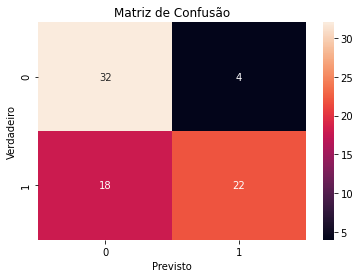

In [ ]:
# matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

É possível também visualizar como ficou a árvore, criando um dot e desenhando ele usando as bibliotecas abaixo.

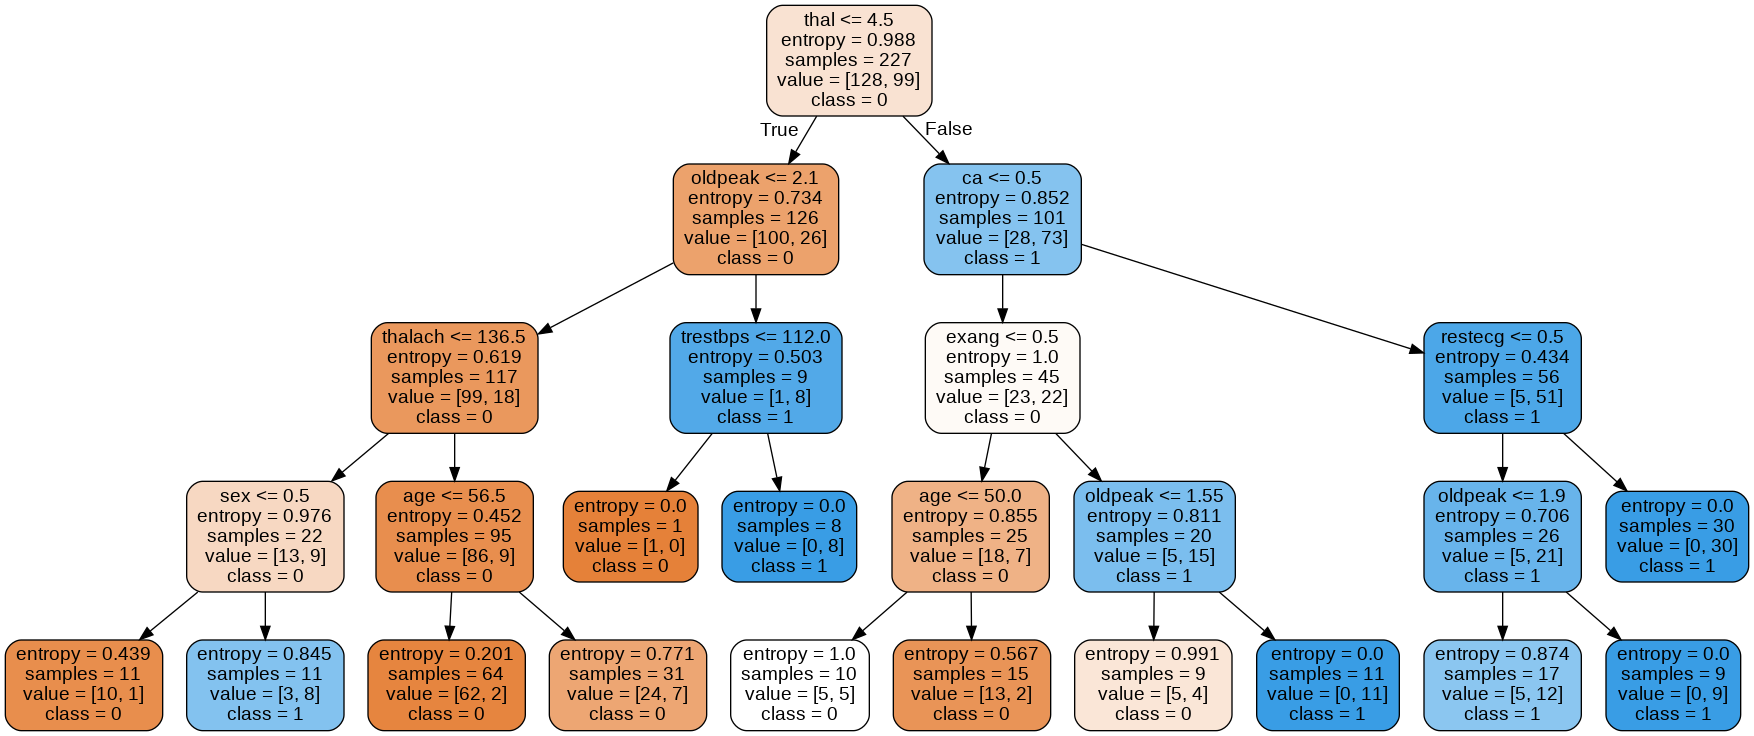

In [ ]:
# importar bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(model, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())